In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


In [18]:
# read csv file
# dataframe = pd.read_csv('../input/tsla-stock/TSLA.csv')
dataframe = pd.read_csv('prices-split-adjusted.csv')
dataframe = dataframe[dataframe.symbol == 'AAPL']
dataframe = dataframe[['date','open','close']]
dataframe.columns = ['Time', 'First', 'Last']
dataframe['Time']=pd.to_datetime(dataframe['Time'],infer_datetime_format=True)
dataframe.head()

,Time,First,Last
254,2010-01-04,30.490000,30.572857
721,2010-01-05,30.657143,30.625713
1189,2010-01-06,30.625713,30.138571
1657,2010-01-07,30.250000,30.082857
2125,2010-01-08,30.042856,30.282858


## Take average value of opening and closing stock for smoothness

AxesSubplot(0.125,0.2;0.775x0.68)


array([ 30.53142829,  30.64142793,  30.382142  , ..., 117.1399995 ,
       116.59      , 116.235001  ])

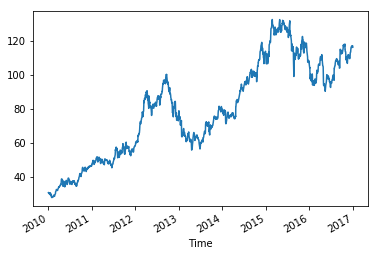

In [3]:
dataframe['Avg'] = (0.5*(dataframe['First'] + dataframe['Last']))
plot_df = dataframe[['Time', 'Avg']]
print(plot_df.set_index(plot_df.Time)['Avg'].plot())
dataset = dataframe.Avg.values
dataset

## Scaling the datasets

In [4]:
dataset = (0.5*(dataframe['First'] + dataframe['Last'])).values
print(dataset)
min_max_scaler = MinMaxScaler()
nparr = np.array([dataset])
dataset = min_max_scaler.fit_transform(np.reshape(nparr, (len(nparr[0]), 1)))
dataset = np.reshape(dataset, (1, len(dataset)))[0]
dataset

[ 30.53142829  30.64142793  30.382142   ... 117.1399995  116.59
 116.235001  ]


array([0.02746703, 0.02851559, 0.02604397, ..., 0.85305752, 0.84781469,
       0.84443069])

## Time delay function create time sequence of a given day

In [5]:
def timeDelay(data, delay):
    X_data, y_data = [], []
    #naive version, vectorized version can be implemented,
    #but may run out of memory,
    for i in range(delay, len(data)):
        X_data.append(data[i - (delay):i].tolist())
    X_data = np.array(X_data)
    y_data = data[delay:]
    
    plt.plot(range(len(X_data.flatten())), X_data.flatten(), linestyle='solid', color='green', label='time delayed data')
    plt.plot(range(len(y_data)), y_data, linestyle='solid', color='blue', label='original data')
    
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)), np.reshape(y_data, (len(y_data),))

## LSTM Model

In [6]:
def model():
    model = Sequential()
    model.add(LSTM(4,input_shape=(5, 1), dropout=0.2))
    model.add(Dense(1))
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

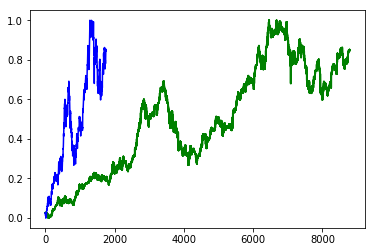

In [7]:
ratio = 0.8 # Training test ratio
d = 5 # Delay
X, y = timeDelay(dataset, d)
n = int(ratio * len(X))

In [8]:
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]

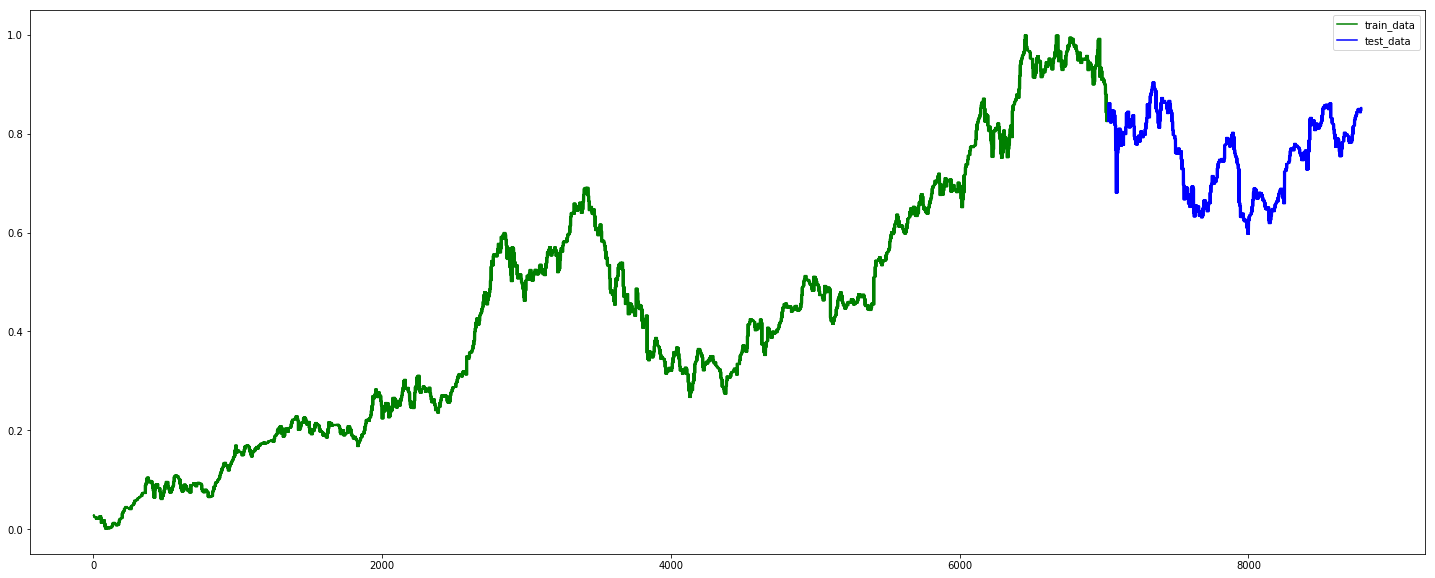

In [9]:
x_train_flattened = X_train.flatten()
x_test_flattened = X_test.flatten()
plt.figure(figsize=(25,10))
plt.plot(range(len(x_train_flattened)), x_train_flattened, linestyle='solid', color='green', label='train_data')
plt.plot(
    range(len(x_train_flattened), len(x_train_flattened) + len(x_test_flattened)), 
    x_test_flattened, linestyle='solid', color='blue', label='test_data')
plt.legend()

In [10]:
model = model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Compilation Time :  0.05600142478942871


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 2s - loss: 0.0426
Epoch 2/50
 - 0s - loss: 0.0401
Epoch 3/50
 - 0s - loss: 0.0324
Epoch 4/50
 - 0s - loss: 0.0295
Epoch 5/50
 - 0s - loss: 0.0296
Epoch 6/50
 - 0s - loss: 0.0284
Epoch 7/50
 - 0s - loss: 0.0256
Epoch 8/50
 - 0s - loss: 0.0248
Epoch 9/50
 - 0s - loss: 0.0253
Epoch 10/50
 - 0s - loss: 0.0229
Epoch 11/50
 - 0s - loss: 0.0194
Epoch 12/50
 - 0s - loss: 0.0236
Epoch 13/50
 - 0s - loss: 0.0199
Epoch 14/50
 - 0s - loss: 0.0196
Epoch 15/50
 - 0s - loss: 0.0192
Epoch 16/50
 - 0s - loss: 0.0159
Epoch 17/50
 - 0s - loss: 0.0177
Epoch 18/50
 - 0s - loss: 0.0162
Epoch 19/50
 - 0s - loss: 0.0164
Epoch 20/50
 - 0s - loss: 0.0161
Epoch 21/50
 - 0s - loss: 0.0159
Epoch 22/50
 - 0s - loss: 0.0141
Epoch 23/50
 - 0s - loss: 0.0151
Epoch 24/50
 - 0s - loss: 0.0143
Epoch 25/50
 - 0s - loss: 0.0132
Epoch 26/50
 - 0s - loss: 0.0132
Epoch 27/50
 - 0s - loss: 0.0110
Epoch 28/50
 - 0s - loss: 0.0116
Epoch 29/50
 - 0s - loss: 0.0115
Epoc

In [13]:
baseline_testScore = min_max_scaler.inverse_transform(np.array([[mean_squared_error(y_test[10:], y_test[:-10])**.5]]))
trainScore = min_max_scaler.inverse_transform(np.array([[model.evaluate(X_train, y_train, verbose=0)**.5]]))
testScore = min_max_scaler.inverse_transform(np.array([[model.evaluate(X_test, y_test, verbose=0)**.5]]))

print('baseline test score = %.2f RMSE' % baseline_testScore)
print('train score = %.2f RMSE' % trainScore)
print('test score = %.2f RMSE' % testScore)

baseline test score = 32.79 RMSE
train score = 35.06 RMSE
test score = 38.77 RMSE


In [14]:
# generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [15]:
y = np.append(y_train, y_test)
y_pred = np.append(y_train_pred, y_test_pred)

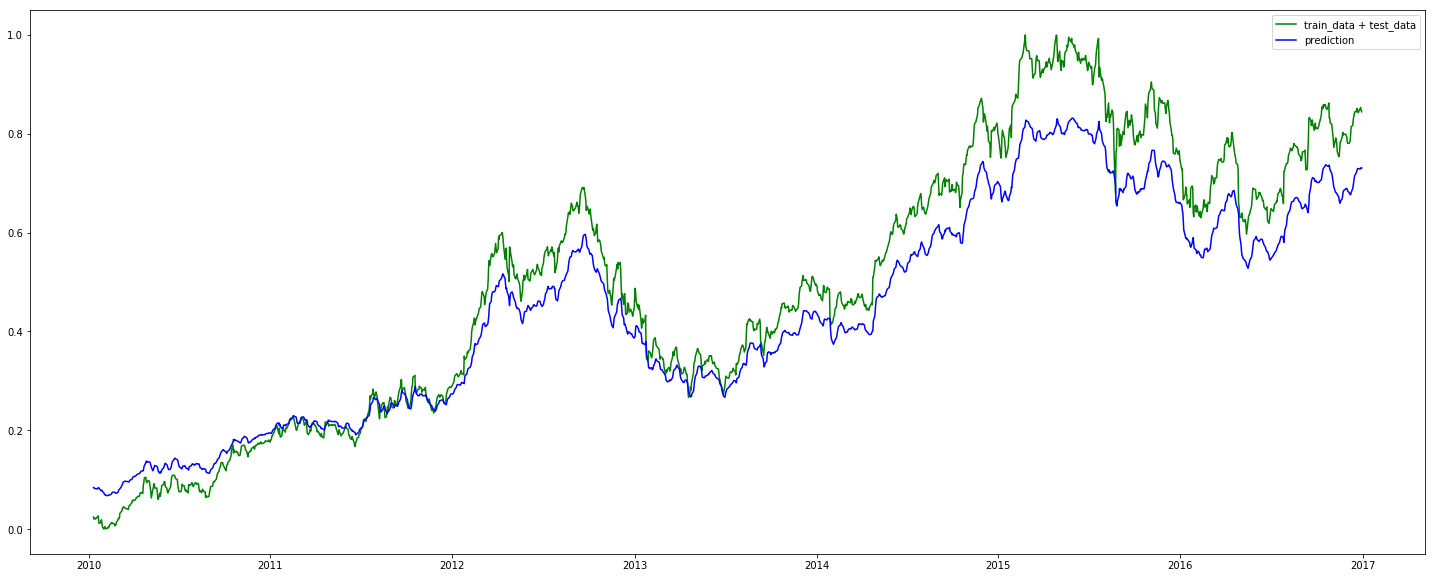

In [16]:
nn = 10000
plt.figure(figsize=(25,10))

plt.plot(dataframe['Time'][5:][-nn:], y[-nn:], linestyle='solid', color='green', label='train_data + test_data')
plt.plot(dataframe['Time'][5:][-nn:], y_pred[-nn:], linestyle='solid', color='blue', label='prediction')

plt.legend()